<a href="https://colab.research.google.com/github/DangTrungNhut/Artificial-Intelligence-course_Full/blob/main/wk7_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
url = 'Housing.csv'
data = pd.read_csv(url)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


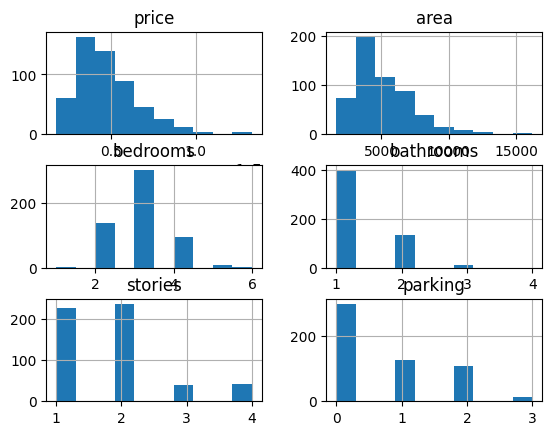

In [3]:
data.hist()  #ve tan suat du lieu
plt.show()


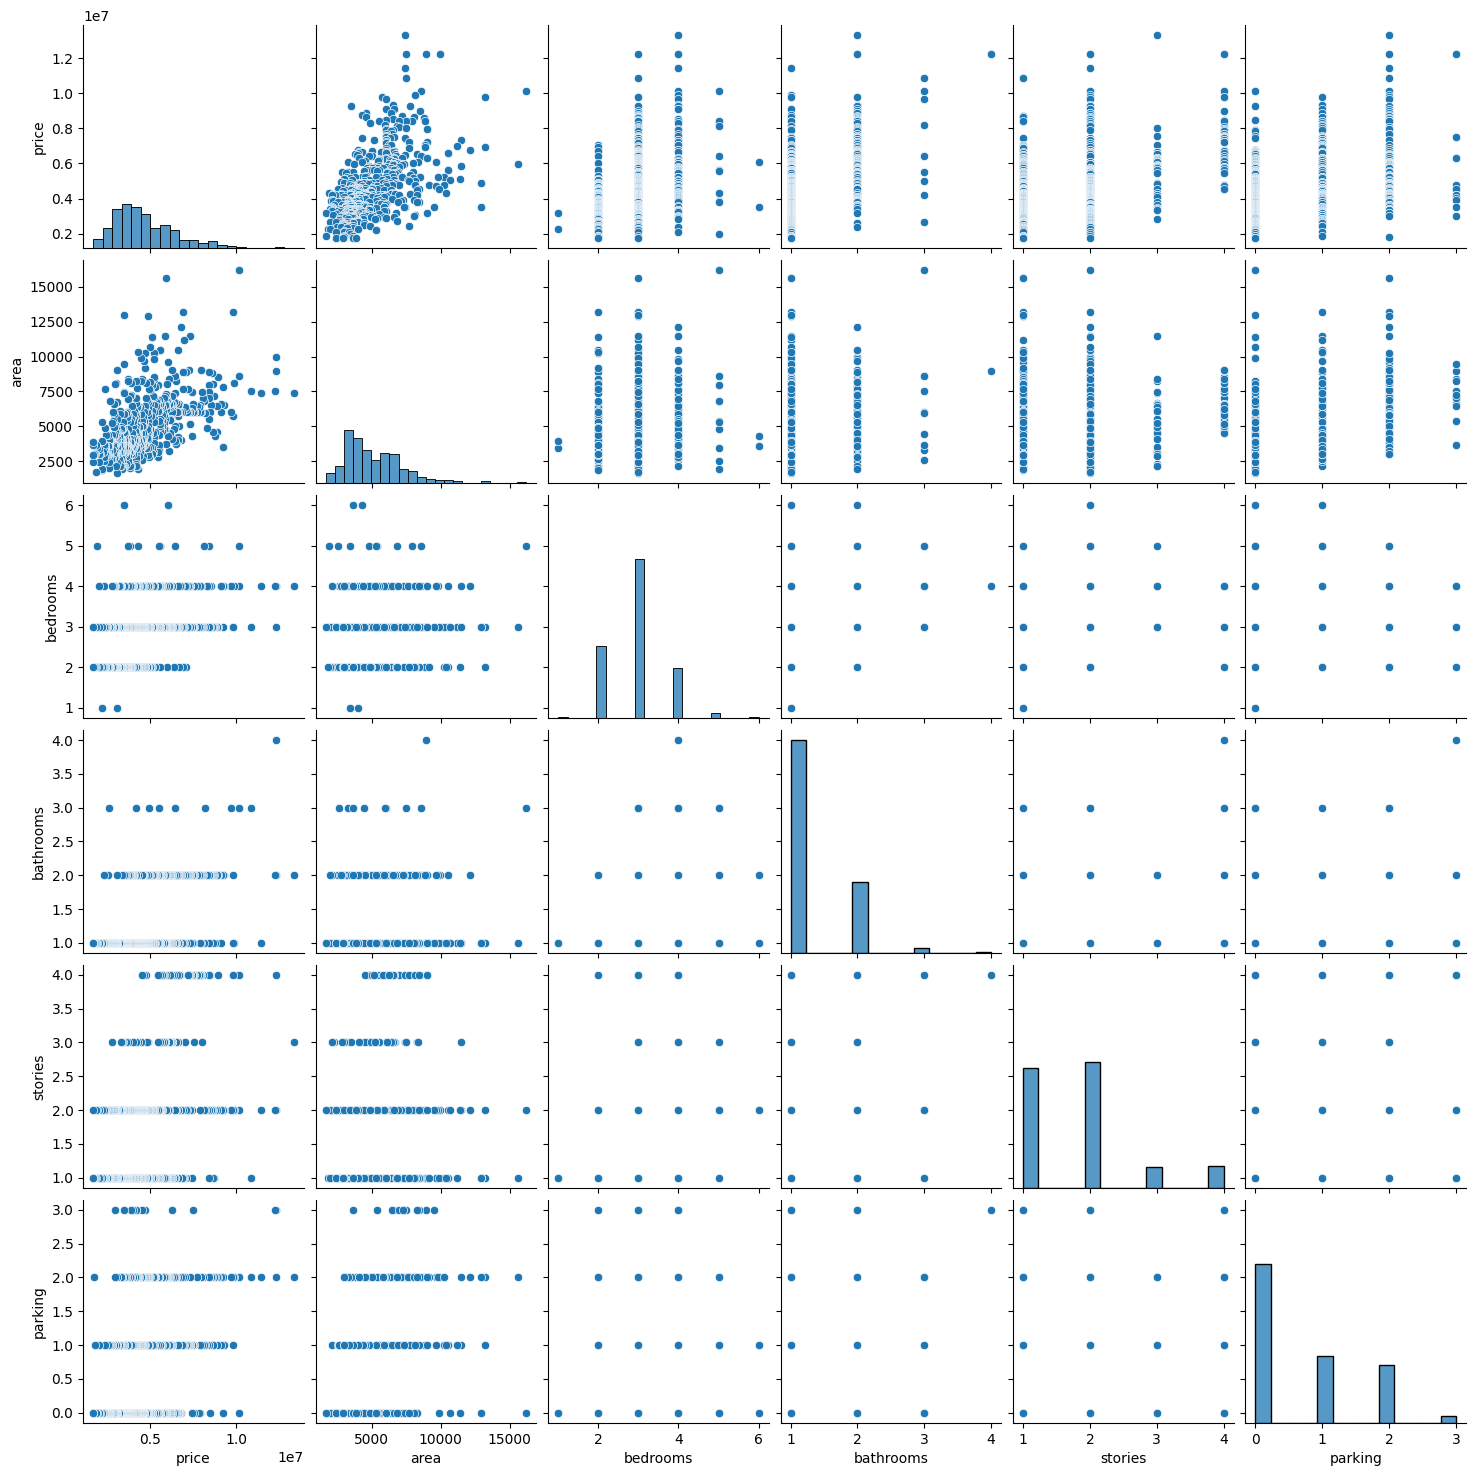

In [4]:
sns.pairplot(data)  #Moi quan he giua cac cap bien

In [5]:
correlation = data.corr()  #tuong quan giua cac bien(****)
print(correlation)

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000


<Axes: >

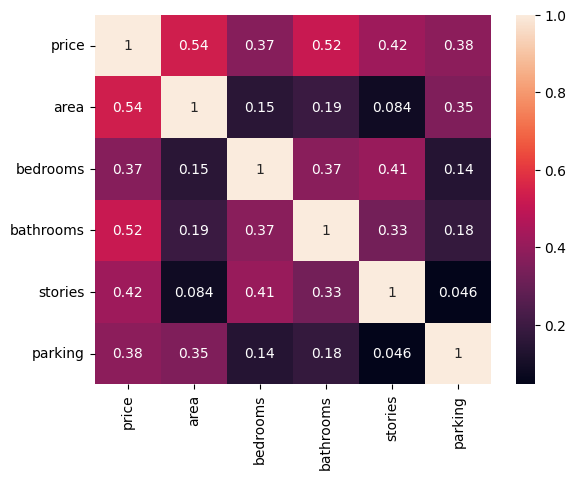

In [6]:
sns.heatmap(correlation, annot = True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='area', ylabel='price'>

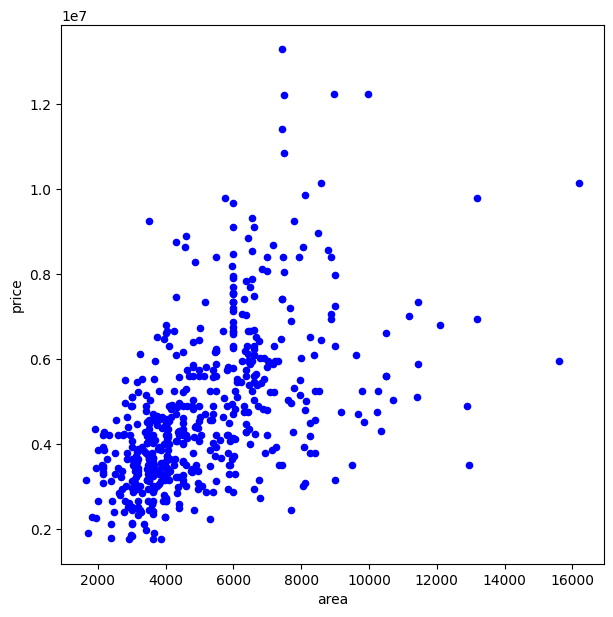

In [7]:
data.plot(kind= 'scatter', x = 'area', y = 'price', figsize = (7 , 7), color = 'blue')

In [8]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X = pd.DataFrame(data['area']), y= data['price'])
print(model.intercept_)
print(model.coef_)
print("Do chinh xac:", model.score(X = pd.DataFrame(data['area']), y = data['price']))

2387308.48239643
[461.97489427]
Do chinh xac: 0.2872931546811469


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


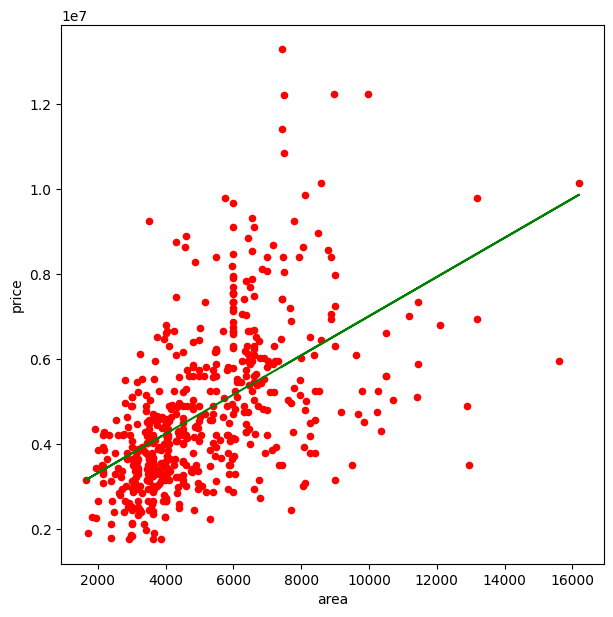

In [9]:
data.plot(kind= 'scatter', x = 'area', y= 'price', figsize = (7,7), color = 'red')
y_pred = model.predict(X = pd.DataFrame(data['area']))
plt.plot(data['area'], y_pred, color = 'green')

In [10]:
#Bac 2
model = linear_model.LinearRegression()
X = pd.DataFrame([data['area'], data['area']**2]).T
model.fit(X, y= data['price'])
print('Intercept cua mo hinh:', model.intercept_)
print('Coefficient cua mo hinh:', model.coef_)
print('Do chinh xac cua mo hinh:', model.score(X, y = data['price']))

Intercept cua mo hinh: 795440.7576065883
Coefficient cua mo hinh: [ 1.03518489e+03 -4.35645185e-02]
Do chinh xac cua mo hinh: 0.3230746205562587


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Do chinh xac cua mo hinh: 0.3230746205562587


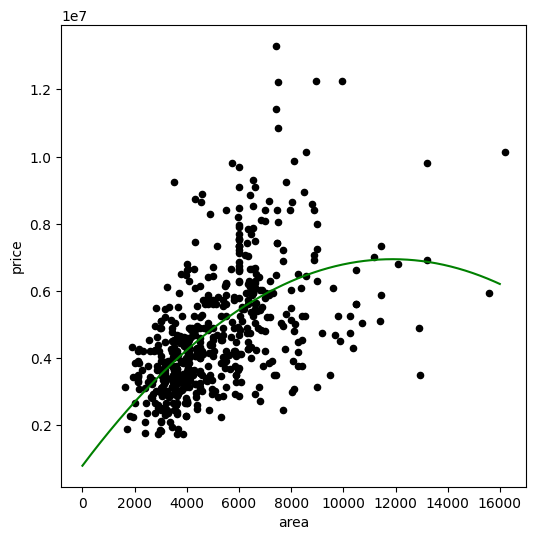

In [11]:
#Ve do thi bac 2
import numpy as np
range = np.arange(1,16000,5)
data.plot(kind= 'scatter', x = 'area', y= 'price', figsize = (6,6), color = 'black')
predictor = pd.DataFrame([range, range**2]).T
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred, color = 'green')
print('Do chinh xac cua mo hinh:', model.score(X, y = data['price']))

In [12]:
#bac 3
model = linear_model.LinearRegression()
X = pd.DataFrame([data['area'], data['area']**2, data['area']**3]).T
model.fit(X, y= data['price'])
print('Intercept cua mo hinh:', model.intercept_)
print('Coefficient cua mo hinh:', model.coef_)
print('Do chinh xac cua mo hinh:', model.score(X, y = data['price']))

Intercept cua mo hinh: 23332.878579673357
Coefficient cua mo hinh: [ 1.43801242e+03 -1.03624409e-01  2.57269135e-06]
Do chinh xac cua mo hinh: 0.32504534381488304


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Do chinh xac cua mo hinh: 0.32504534381488304


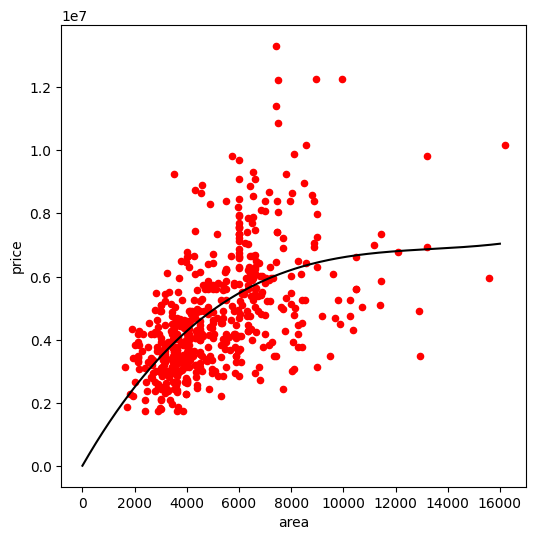

In [13]:
#Ve do thi bac 3
import numpy as np
range = np.arange(0,16000,0.8)
data.plot(kind= 'scatter', x = 'area', y= 'price', figsize = (6,6), color = 'red')
predictor = pd.DataFrame([range, range**2, range**3]).T
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred, color = 'black')
print('Do chinh xac cua mo hinh:', model.score(X, y = data['price']))

In [14]:
#bac 4
model = linear_model.LinearRegression()
X = pd.DataFrame([data['area'], data['area']**2, data['area']**3, data['area']**4]).T
model.fit(X, y= data['price'])
print('Intercept cua mo hinh:', model.intercept_)
print('Coefficient cua mo hinh:', model.coef_)
print('Do chinh xac cua mo hinh:', model.score(X, y = data['price']))

Intercept cua mo hinh: 4765060.861442321
Coefficient cua mo hinh: [-1.87292314e+03  6.60296224e-01 -6.69919196e-05  2.12779050e-09]
Do chinh xac cua mo hinh: 0.34560934200576077


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Do chinh xac cua model: 0.34560934200576077


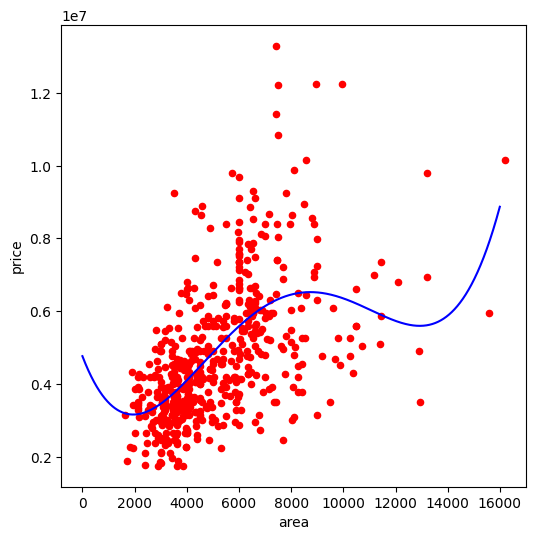

In [15]:
#Ve do thi bac 4
import numpy as np
range = np.arange(1,16000,5)
data.plot(kind= 'scatter', x = 'area', y= 'price', figsize = (6,6), color = 'red')
predictor = pd.DataFrame([range, range**2, range**3, range**4]).T
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred, color = 'blue')
print('Do chinh xac cua model:', model.score(X, y = data['price']))

In [16]:
#bac 10
model = linear_model.LinearRegression()
X = pd.DataFrame([data['area'], data['area']**2, data['area']**3, data['area']**4, data['area']**5
                  , data['area']**6, data['area']**7, data['area']**8, data['area']**9, data['area']**10]).T
model.fit(X, y= data['price'])
print('Intercept cua mo hinh:', model.intercept_)
print('Coefficient cua mo hinh', model.coef_)
print('Do chinh xac:', model.score(X, y = data['price']))


Intercept cua mo hinh: 1942004.113154489
Coefficient cua mo hinh [ 5.46219207e-05  2.51513295e-01 -3.14386000e-05  1.07565322e-09
  8.21565038e-15  1.36557432e-14 -2.74502643e-14 -6.63358257e-15
 -2.63114183e-15  2.20934382e-14]
Do chinh xac: 0.3503364718886245


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Do chinh xac: 0.3503364718886245


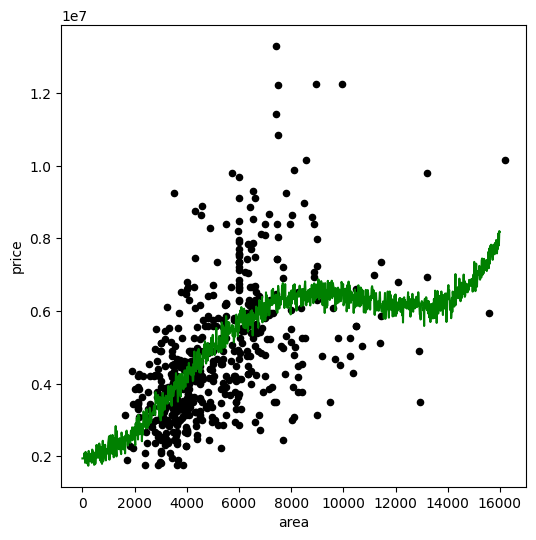

In [17]:
#Ve do thi bac 10
import numpy as np
range = np.arange(1,16000,15)
data.plot(kind= 'scatter', x = 'area', y= 'price', figsize = (6,6), color = 'black')
predictor = pd.DataFrame([range, range**2, range**3, range**4, range**5, range**6, range**7, range**8, range**9, range**10]).T
y_pred = model.predict(X = predictor)
plt.plot(range, y_pred, color = 'green')
print('Do chinh xac:', model.score(X, y = data['price']))